### Loading Our data

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive # Library to mount google drives
import warnings
warnings.filterwarnings("ignore")

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Specify the base directory where images are located.
base_dir = '/content/gdrive/My Drive/'

In [5]:

train_df = pd.read_csv('/content/gdrive/My Drive/loan_sanction_train.csv')
test_df = pd.read_csv('/content/gdrive/My Drive/loan_sanction_test.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [10]:
train_df.shape

(614, 13)

In [11]:
test_df.shape

(367, 12)

In [12]:
test_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [13]:

# Duplicated data
train_df[train_df.duplicated() == True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


Here we checked for duplicate values and we can see there is no duplicate values.

## Missing values and outliers treatment

In [14]:
train_df.isnull().values.any()

True

In [15]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#Filling the Missing Values

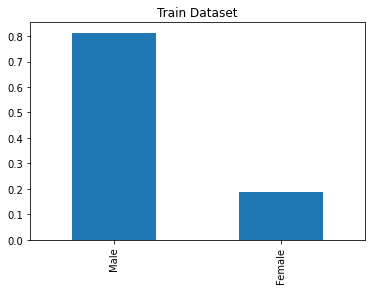

In [16]:
#One approach to fill missing values in categorical data can be to replace them with the most common or occurring values.
ax1 = train_df['Gender'].value_counts(normalize=True).plot.bar(title='Train Dataset')
plt.show()

In [17]:
train_df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

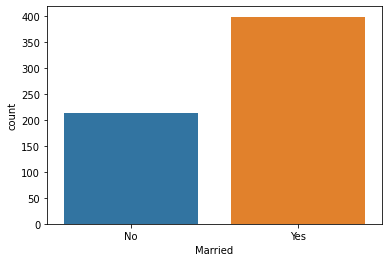

In [18]:
sns.countplot(train_df['Married'])

In [19]:

train_df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

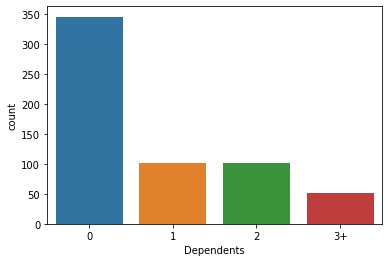

In [20]:
sns.countplot(train_df['Dependents'])

In [21]:

train_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

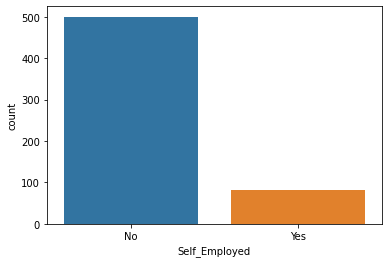

In [22]:
sns.countplot(train_df['Self_Employed'])

In [23]:

train_df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [24]:
train_df['Married'] = train_df['Married'].replace(np.nan,'Yes')
train_df['Dependents'] = train_df['Dependents'].replace(np.nan,'0')
train_df['Self_Employed'] = train_df['Self_Employed'].replace(np.nan,'No')
train_df['Gender'] = train_df['Gender'].replace(np.nan,'Male')

In [25]:

train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].median())
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].median())
train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].median())

In [26]:
100*train_df.isnull().sum()/len(train_df)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [27]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Exploratory Data Analysis


In [28]:
# Columns Types
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [29]:
#Info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [30]:
# Unique Value
{column: list(train_df[column].unique()) for column in train_df.select_dtypes('object').columns[2:]}

{'Married': ['No', 'Yes'],
 'Dependents': ['0', '1', '2', '3+'],
 'Education': ['Graduate', 'Not Graduate'],
 'Self_Employed': ['No', 'Yes'],
 'Property_Area': ['Urban', 'Rural', 'Semiurban'],
 'Loan_Status': ['Y', 'N']}

In [53]:
#Data visualization columns preparation
num_cols=train_df.select_dtypes([np.number]).columns
print(num_cols)
cat_cols=train_df.select_dtypes('object').drop(['Loan_ID','Loan_Status'],axis=1).columns
print(cat_cols)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
Index([], dtype='object')


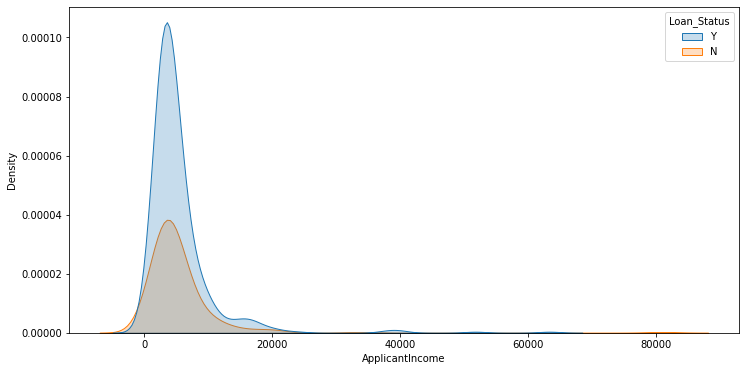

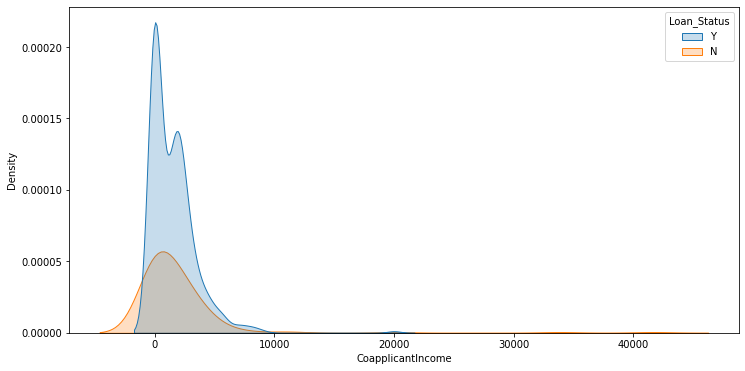

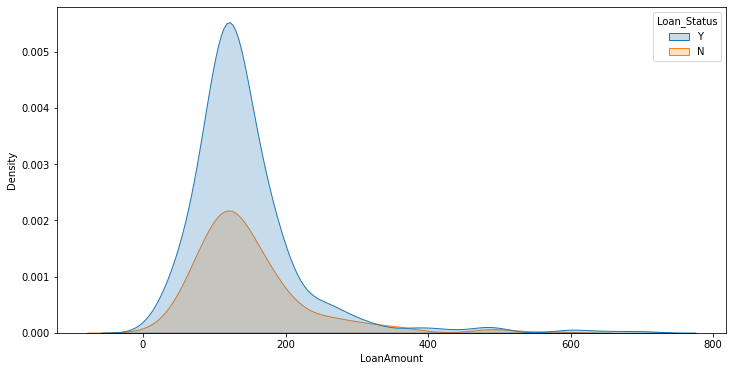

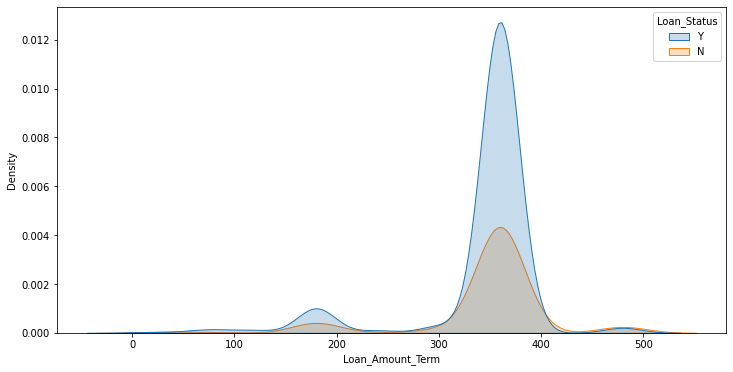

In [32]:
#Plots to analyse the relationship between numerical features and Loan status
for col in num_cols:
    if col=='Credit_History':
        continue
    plt.figure(figsize=(12,6))
    sns.kdeplot(data=train_df,x=col,hue='Loan_Status',shade=True)
    plt.show()

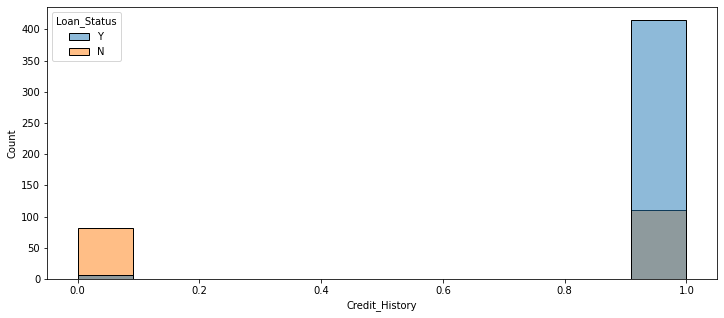

In [33]:
#Relationship between credit history and loan status
plt.figure(figsize=(12,5))
sns.histplot(data=train_df,x='Credit_History',hue='Loan_Status')
plt.show()

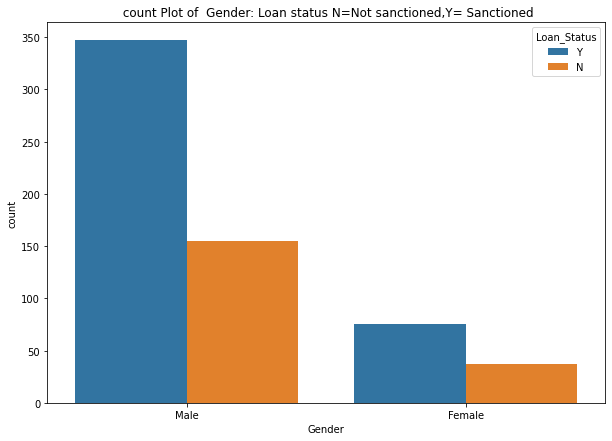

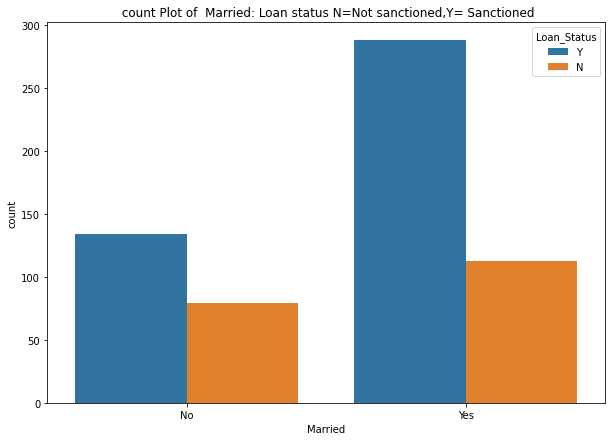

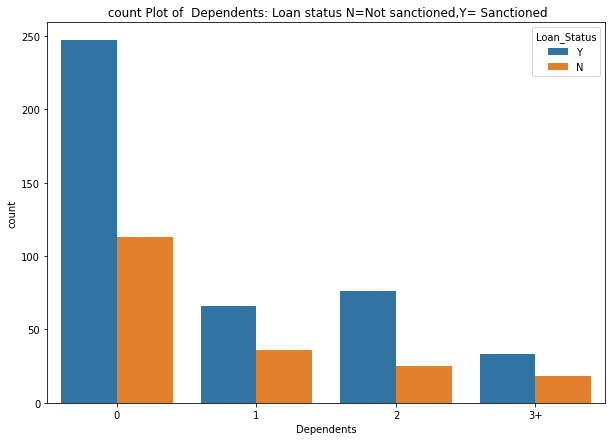

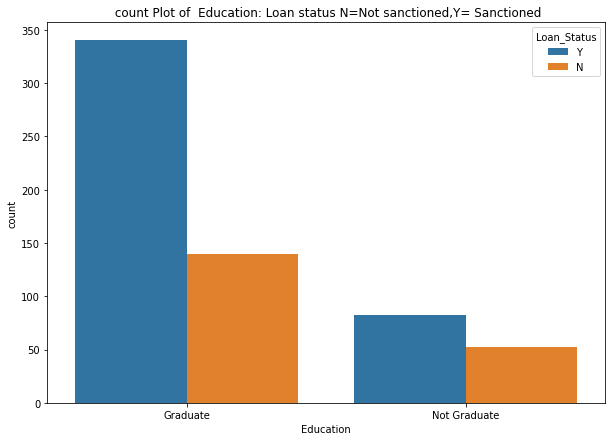

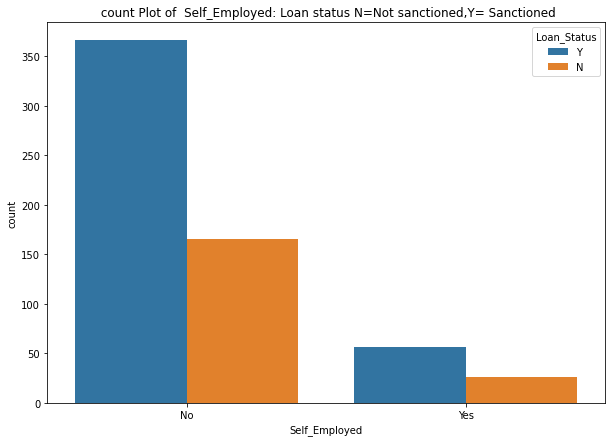

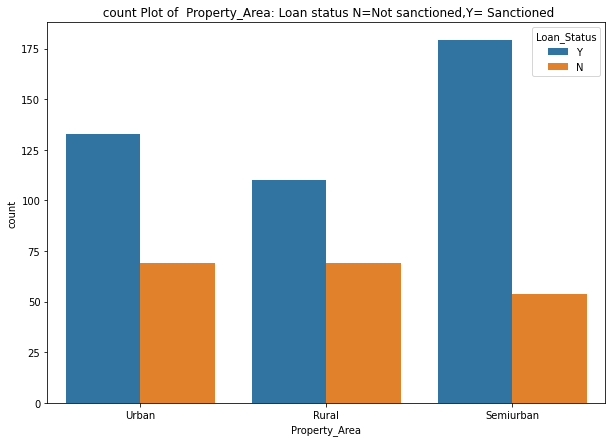

In [34]:
#analysing relationship among categorical variables and applicant income with Loan status
for col in cat_cols:
    plt.figure(figsize=(10,7))
    sns.countplot(data=train_df,x=col,hue='Loan_Status',)
    plt.title(' count Plot of  '+col+': Loan status N=Not sanctioned,Y= Sanctioned')
    plt.show()

In [37]:

fig = px.scatter(train_df, x='ApplicantIncome', y='LoanAmount',color="Loan_Status")
fig.update_layout(title='Applicant Income Vs Loan Amount With Loan Status ',xaxis_title="Applicant Income",yaxis_title="Loan Amount ",title_x=0.5)
fig.show()

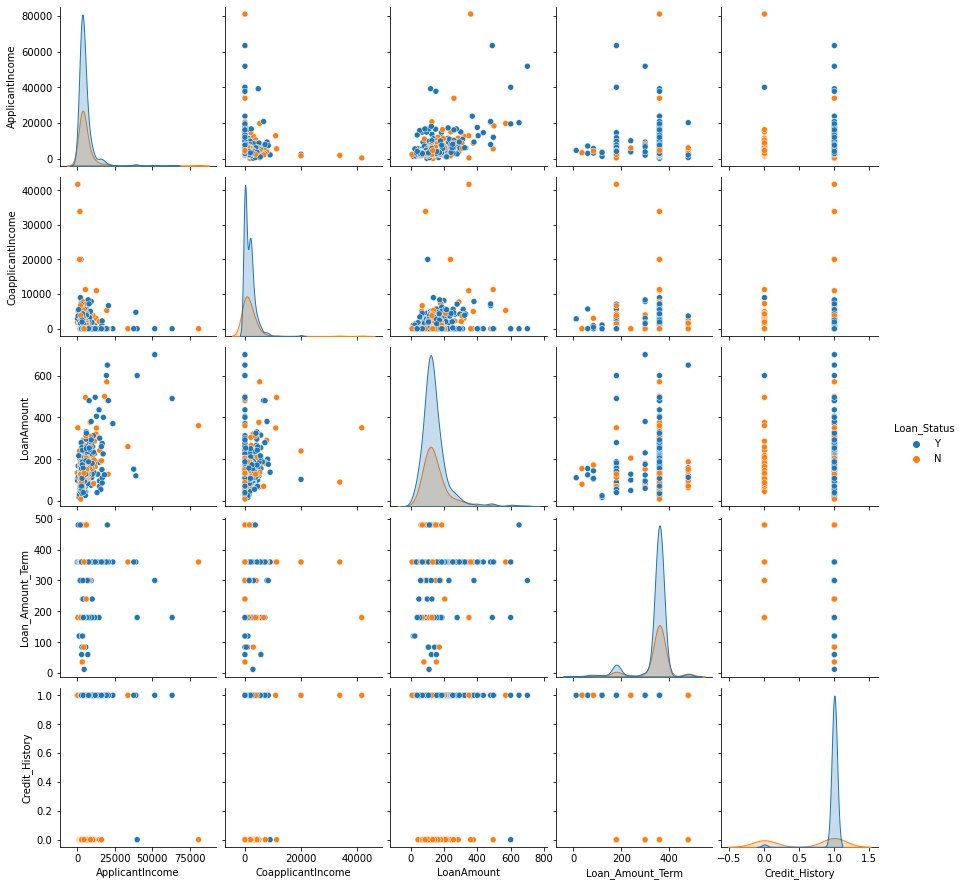

In [38]:
sns.pairplot(train_df,hue = 'Loan_Status')

## Correlation Matrix


In [54]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
train_df['Gender']= label_encoder.fit_transform(train_df['Gender'])
train_df['Married']= label_encoder.fit_transform(train_df['Married'])
train_df['Dependents']= label_encoder.fit_transform(train_df['Dependents'])
train_df['Education']= label_encoder.fit_transform(train_df['Education'])
train_df['Self_Employed']= label_encoder.fit_transform(train_df['Self_Employed'])
train_df['Property_Area']= label_encoder.fit_transform(train_df['Property_Area'])
train_df['Loan_Status']= label_encoder.fit_transform(train_df['Loan_Status'])
print(train_df.head())

    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              0            0  
2       

In [55]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


Correlation Matrix


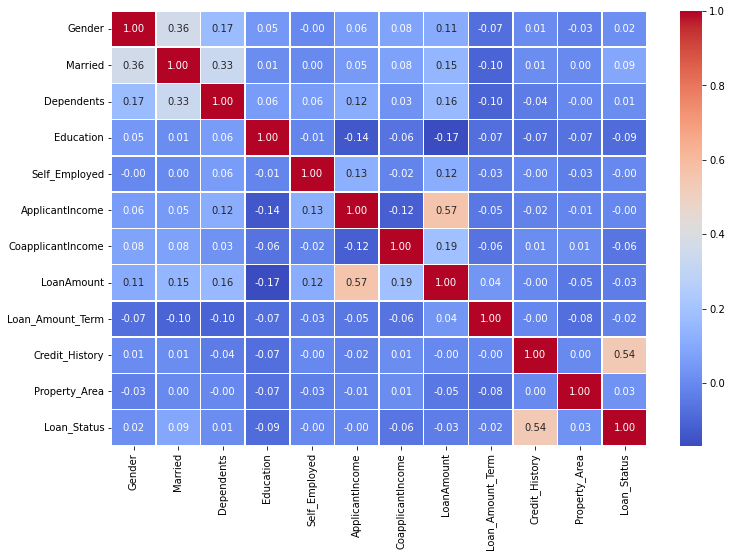

In [58]:
print("Correlation Matrix")
plt.rcParams['figure.figsize']=(12,8)
sns.heatmap(train_df.corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True);